In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import matplotlib
from pylab import *
import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv('apparel-trainval.csv')
# dataset

In [12]:
X = dataset.drop('label', axis = 1)
Y = dataset['label']

In [13]:
X = (X - np.mean(X))/np.std(X)

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [15]:
X_train = X_train.iloc[:]
Y_train=pd.concat([Y_train,pd.get_dummies(Y_train,prefix='label')],axis=1).drop(['label'],axis=1)
Y_train = Y_train.iloc[:]

In [16]:
epoch_error = []

In [17]:
class Neural_network(object):
    
    def __init__(self):
        self.input_layer_size = 784
        self.output_layer_size = 10
        self.hidden_layer_size = 70
        self.hidden_layers = 1
        self.weights = {}
        self.dweights = {}
        self.Z = {}
        self.a = {}
        self.Y_hat = np.array([])
        self.delta = {}
        self.epoch = 500
        self.ita = 0.001
        
    def initialization(self):
        
        self.weights[1] = np.random.randn(self.input_layer_size,self.hidden_layer_size)*0.01
        self.weights[self.hidden_layers+1] = np.random.randn(self.hidden_layer_size,self.output_layer_size)*0.01
        
        for i in np.arange(2,self.hidden_layers+1):
            self.weights[i] = np.random.randn(self.hidden_layer_size,self.hidden_layer_size)*0.01
            
    
    def softmax(self,a):
        tsum = np.sum(a,axis = 1,keepdims = True)
        soft_a = np.divide(a,tsum)
        return soft_a
    
#     def y_prep(self,Y,k):
#          # Onehot
#         y = np.zeros((len(Y),self.output_layer_size))
#         for i in range(y.shape[0]):
#             y[i][Y[i]] = 1
#         return y
    
    
    def error(self,y):
        return sum(0.5*np.sum((y-self.Y_hat)*(y-self.Y_hat),axis = 1))
    
    def derivative_sigmoid(self,layer):
        derivative = layer*(1-layer)
        return derivative
    
   
    def deltas(self,y):
        w = self.a[self.hidden_layers+2]
        self.delta[self.hidden_layers+2] = -(y - self.Y_hat)*self.derivative_sigmoid(w)
        self.dweights[self.hidden_layers+1] = np.dot(self.a[self.hidden_layers+1].T , (self.delta[self.hidden_layers+2]))
        
        for i in np.arange(self.hidden_layers+1,1,-1):
            self.delta[i] = ( np.dot(self.delta[i+1], self.weights[i].T))*self.derivative_sigmoid(self.a[i])
            self.dweights[i-1] = np.dot(self.a[i-1].T , (self.delta[i]))  
    
    def sigmoid(self,x):
        x = -x
        return 1 / (1 + np.exp(x))
    
    
    
    def forward_propagation(self, X):
        self.a[1]=np.array(X)
        

        for i in range(1,self.hidden_layers+2):
            self.Z[i+1] = np.dot(self.a[i],self.weights[i])
            self.a[i+1] = self.sigmoid(self.Z[i+1])
        self.Y_hat = self.softmax(self.a[self.hidden_layers+2])
        
   
    def gradient_descent(self,X_train,Y_train):
        k = 0
        while k<=900:
#             X=X_train.iloc[k:k+1000]
#             Y=Y_train.iloc[k:k+1000]
            X = X_train[k:k+3000]
            y = Y_train[k:k+3000]
#             print(y)
            for i in range(self.epoch):
                self.forward_propagation(X)
                epoch_error.append(self.error(y))
#                 y = self.y_prep(Y,k)
                print("Error : ",self.error(y))
                    
                self.deltas(y)
                for j in range(1,self.hidden_layers+2):
                    self.weights[j] = self.weights[j] - self.ita*self.dweights[j]
            print("Final Error : ",self.error(y))
            k = k + 10000
        
            

k = Neural_network()
k.initialization()
#k.forward_propagation(X_train)
k.gradient_descent(X_train,Y_train)


Error :  1350.0908173467274
Error :  1347.2629164853845
Error :  1343.8619619804872
Error :  1337.4260314384783
Error :  1325.418754414628
Error :  1306.0496896813092
Error :  1280.5892729647942
Error :  1253.2016353923586
Error :  1227.4852422507938
Error :  1204.5181132231423
Error :  1183.7766084293728
Error :  1164.4142807847934
Error :  1145.78319085476
Error :  1127.480036742443
Error :  1109.283880698094
Error :  1091.09948974002
Error :  1072.909387795019
Error :  1054.7356334641083
Error :  1036.6204197826062
Error :  1018.6238847026755
Error :  1000.8273073788372
Error :  983.3324681515239
Error :  966.2543688984244
Error :  949.7080290918198
Error :  933.7927659704395
Error :  918.5781731083171
Error :  904.0964473841923
Error :  890.3439657448548
Error :  877.2892769843711
Error :  864.8817787517797
Error :  853.0581342160235
Error :  841.746910278127
Error :  830.8727752021014
Error :  820.3610895330899
Error :  810.1431946298029
Error :  800.1622470842775
Error :  790.378

Error :  221.84815418228433
Error :  221.3247615194228
Error :  220.80371281859524
Error :  220.28499105387922
Error :  219.76857868614485
Error :  219.25445759645578
Error :  218.74260906177807
Error :  218.23301377153606
Error :  217.725651879763
Error :  217.22050308509026
Error :  216.71754672968098
Error :  216.2167619082735
Error :  215.71812757944951
Error :  215.22162267272353
Error :  214.72722618674607
Error :  214.2349172755658
Error :  213.74467532135344
Error :  213.2564799931617
Error :  212.77031129216482
Error :  212.28614958441182
Error :  211.80397562247452
Error :  211.3237705575388
Error :  210.84551594351535
Error :  210.36919373468618
Error :  209.8947862782886
Error :  209.42227630329404
Error :  208.95164690648664
Error :  208.48288153679397
Error :  208.01596397867823
Error :  207.5508783352624
Error :  207.08760901174355
Error :  206.62614069953293
Error :  206.16645836146137
Error :  205.7085472182951
Error :  205.25239273672258
Error :  204.79798061889738
Er

Text(0.5, 1.0, 'Epoch vs Error')

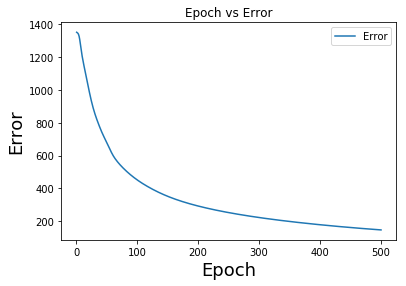

In [18]:
fig, ax = plt.subplots()
x_axis = [i for i in range(1,501,1)]
ax.plot(x_axis, epoch_error, label="Error")
ax.legend(loc=1)
ax.set_xlabel("Epoch", fontsize=18)
ax.set_ylabel("Error", fontsize=18)
ax.set_title('Epoch vs Error')